In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)
print(data.shape)
data.columns = data.columns.str.replace(" ", "_")
data.head()

(23486, 10)


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Feature Engineering

In [3]:
data.dropna(subset=['Review_Text'], inplace=True)
data.shape

(22641, 10)

In [4]:
# Count word length and unique words
data['review_word_count'] = data['Review_Text'].apply(lambda x: len(str(x).split()))
data['review_unique_word_count'] = data['Review_Text'].apply(lambda x: len(set(str(x).split())))

In [5]:
# Reducing the number of clothing ID with low appearance count.

clothing_id_to_combine=[]
for val, cnt in data.Clothing_ID.value_counts().items():
    # If that Clothing_ID is present less than 1%(~200) of the total data, club it into '000' (default) id
    if(cnt<200):
        clothing_id_to_combine.append(val)

print("# of clothing ID's clubbed: ",len(clothing_id_to_combine))

data['new_clothingID']= data.Clothing_ID.apply(lambda x: '000' if x in clothing_id_to_combine else x)
data.new_clothingID.value_counts(normalize=True)

# of clothing ID's clubbed:  1151


new_clothingID
000     0.542997
1078    0.043593
862     0.034362
1094    0.032463
1081    0.024778
872     0.022923
829     0.022614
1110    0.020803
868     0.018285
895     0.016960
936     0.015370
867     0.014708
850     0.014310
1095    0.014266
863     0.012853
1077    0.012676
1059    0.012676
1086    0.012499
1080    0.012367
860     0.012190
1083    0.010777
861     0.010070
873     0.009849
1092    0.009673
828     0.009408
1033    0.009364
927     0.009143
1056    0.009099
820     0.008922
Name: proportion, dtype: float64

## Sentiment Analysis

In [6]:
# !pip install -q -U vaderSentiment

In [7]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# data['review_sentiment']= [analyzer.polarity_scores(line)['compound'] for line in data['Review_Text']]
data['review_sentiment'] = [analyzer.polarity_scores(str(line))['compound'] for line in data['Review_Text']]

In [9]:
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,review_word_count,review_unique_word_count,new_clothingID,review_sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,7,000,0.8932
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,47,1080,0.9729
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,72,1077,0.9208
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,20,000,0.5727
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,28,000,0.9291


In [10]:
# Sentiment score for title
# If title is empty, make sentiment score to be 0

data.Title.fillna('no title', inplace=True)
data['title_sentiment']= data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if str(x)!= 'no title' else 0.0)

for index, row in data[100:120].iterrows():
    print(row['Title']," >>>>>", row['title_sentiment'])

Not a fan  >>>>> -0.2411
no title  >>>>> 0.0
Excited ... but ...  >>>>> 0.1779
Beautiful shirt but runs small!  >>>>> 0.4102
Beautiful  >>>>> 0.5994
Perfect fall shirt!  >>>>> 0.6114
no title  >>>>> 0.0
Poor quality  >>>>> -0.4767
An almost for me...  >>>>> 0.0
Beautiful, stunning, cozy top!  >>>>> 0.8221
Cute and comfy  >>>>> 0.4588
Disappointing quality  >>>>> -0.4939
Cute tee  >>>>> 0.4588
Very vintage feel  >>>>> 0.0
no title  >>>>> 0.0
Awkward fitting  >>>>> -0.1531
Cozy casual - perfect for fall  >>>>> 0.6705
The perfect striped t  >>>>> 0.5719
no title  >>>>> 0.0
no title  >>>>> 0.0


In [11]:
data['total_sentiment_score']= data['title_sentiment']+ data['review_sentiment']
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,review_word_count,review_unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,7,000,0.8932,0.0000,0.8932
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,47,1080,0.9729,0.0000,0.9729
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,72,1077,0.9208,0.0000,0.9208
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,20,000,0.5727,0.5093,1.0820
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,28,000,0.9291,0.3182,1.2473


## Preprocessing

In [12]:
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def get_pos_tag(tag):
    """This function is used to get the part-of-speech(POS) for lemmatization"""

    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [15]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    # print(text)
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

STOPWORDS = stopwords.words('english')

# Adding business common term to stopwords
common_terms= ["wear","look","ordered","color","purchase","order"]

STOPWORDS = set(STOPWORDS + common_terms)

def listbased_stopwords(sentence):

  filtered_text = [word for word in str(sentence).split() if word not in STOPWORDS]

  result_length = len(filtered_text)
  filtered_text = " ".join(filtered_text)
  return filtered_text

def preprocess(text):
    punc = list(string.punctuation)

    text = str(text).lower()
    text = remove_punctuation(text)

    # word_tokens = [word for word in text if not (word in punc or len(word) < 3)]
    # pos_tags = nltk.pos_tag(word_tokens)

    # print(word_tokens)

    # text = [wordnet_lemmatizer.lemmatize(word, pos=get_pos_tag(tag)) for word, tag in pos_tags]
    text = listbased_stopwords(text)
    # text = correct_spellings(text)

    return text

In [16]:
data['Preprocessed'] = data['Review_Text'].apply(lambda x: preprocess(x))
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,review_word_count,review_unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score,Preprocessed
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,7,000,0.8932,0.0000,0.8932,absolutely wonderful silky sexy comfortable
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,47,1080,0.9729,0.0000,0.9729,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,72,1077,0.9208,0.0000,0.9208,high hopes dress really wanted work initially ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,20,000,0.5727,0.5093,1.0820,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,28,000,0.9291,0.3182,1.2473,shirt flattering due adjustable front tie perf...


## Apply POS Tagging

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
def extract_pos(text):
    # print(text.split())
    pos_tags= nltk.pos_tag(text.split())
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")]
    return all_adj_nouns

In [19]:
data['Final Text'] = data['Preprocessed'].apply(extract_pos)
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,review_word_count,review_unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score,Preprocessed,Final Text
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,7,000,0.8932,0.0000,0.8932,absolutely wonderful silky sexy comfortable,"[wonderful, silky, sexy, comfortable]"
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,47,1080,0.9729,0.0000,0.9729,love dress sooo pretty happened find store im ...,"[dress, sooo, find, store, im, glad, bc, petit..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,72,1077,0.9208,0.0000,0.9208,high hopes dress really wanted work initially ...,"[high, hopes, wanted, work, small, usual, size..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,20,000,0.5727,0.5093,1.0820,love love love jumpsuit fun flirty fabulous ev...,"[love, love, jumpsuit, fun, fabulous, time, no..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,28,000,0.9291,0.3182,1.2473,shirt flattering due adjustable front tie perf...,"[shirt, due, adjustable, front, tie, perfect, ..."


# T-SNE + PCA reduction

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pylab as pl
import time

In [21]:
data_copy = data.copy()

In [22]:
# Filter the data by department name
# filtered_data = data[data['Department_Name'] == 'Intimate']
# filtered_data = data[data['Department_Name'] == 'Dresses']
# filtered_data_bottoms = data[data['Department_Name'] == 'Bottoms']
# filtered_data_tops = data[data['Department_Name'] == 'Tops']
# filtered_data = data[data['Department_Name'] == 'Jackets']
# filtered_data = data[data['Department_Name'] == 'Trend']

## Feature Encoding

In [23]:
# filtered_data_bottoms.drop(columns=['Review_Text','Title','Clothing_ID','review_sentiment','title_sentiment', 'Preprocessed', 'Final Text'], inplace=True)
# filtered_data_tops.drop(columns=['Review_Text','Title','Clothing_ID','review_sentiment','title_sentiment', 'Preprocessed', 'Final Text'], inplace=True)

In [24]:
data_copy.drop(columns=['Review_Text','Title','Clothing_ID','review_sentiment','title_sentiment', 'Preprocessed', 'Final Text'], inplace=True)

In [25]:
cat_cols= ['Division_Name','Department_Name','Class_Name','new_clothingID']
for col in cat_cols:
    print(col," has categories:", data_copy[col].nunique())
    data_copy[col] = data_copy[col].astype('category')

Division_Name  has categories: 3
Department_Name  has categories: 6
Class_Name  has categories: 20
new_clothingID  has categories: 29


In [26]:
# !pip install -q -U category-encoders

In [27]:
import category_encoders as ce

be = ce.BinaryEncoder(cols=cat_cols,drop_invariant=True).fit(data_copy)
data_copy = be.transform(data_copy)

In [28]:
data_copy.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name_0,Division_Name_1,Division_Name_2,Department_Name_0,Department_Name_1,Department_Name_2,...,Class_Name_3,Class_Name_4,review_word_count,review_unique_word_count,new_clothingID_0,new_clothingID_1,new_clothingID_2,new_clothingID_3,new_clothingID_4,total_sentiment_score
0,33,4,1,0,0,0,1,0,0,1,...,0,1,8,7,0,0,0,0,1,0.8932
1,34,5,1,4,0,1,0,0,1,0,...,1,0,62,47,0,0,0,1,0,0.9729
2,60,3,0,0,0,1,0,0,1,0,...,1,0,98,72,0,0,0,1,1,0.9208
3,50,5,1,0,0,1,1,0,1,1,...,1,1,22,20,0,0,0,0,1,1.0820
4,47,5,1,6,0,1,0,1,0,0,...,0,0,36,28,0,0,0,0,1,1.2473


In [29]:
# pca_tsne= Pipeline([("pca", PCA(n_components= 0.90, random_state=33)),
#                     ("tsne", TSNE(n_components=2,
#                                   perplexity= 170,
#                                   random_state=33,
#                                   learning_rate= 350,
#                                   n_iter= 5000,
#                                   n_jobs=-1,
#                                   n_iter_without_progress=150,
#                                   verbose=1))])
# t0= time.time()
# data_pca_tsne_reduced= pca_tsne.fit_transform(data_copy)
# t1= time.time()

# print("pca+tsne took:{:.1f}s ".format(t1-t0))

In [30]:
with open('data_pca_tsne_reduced.npy', 'rb') as f:
    data_pca_tsne_reduced = np.load(f)

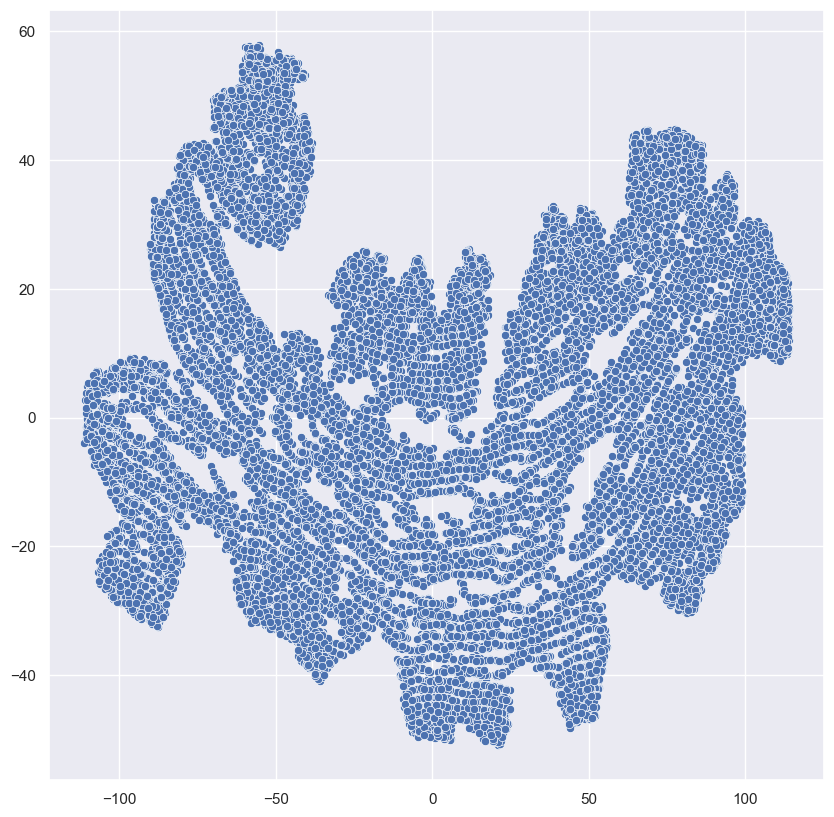

In [31]:
sns.set(rc= {'figure.figsize': (10, 10)})
sns.scatterplot(x=data_pca_tsne_reduced[:,0], y=data_pca_tsne_reduced[:,1])
plt.show()

In [32]:
# np.save('data_pca_tsne_reduced.npy', data_pca_tsne_reduced)

# Clustering

## HDBScan Clustering

In [33]:
from hdbscan import HDBSCAN
# Evaluate Clusters
from sklearn.metrics import silhouette_score

In [34]:
min_cluster_size = int(0.0363 * data_copy.shape[0])
min_cluster_size

821

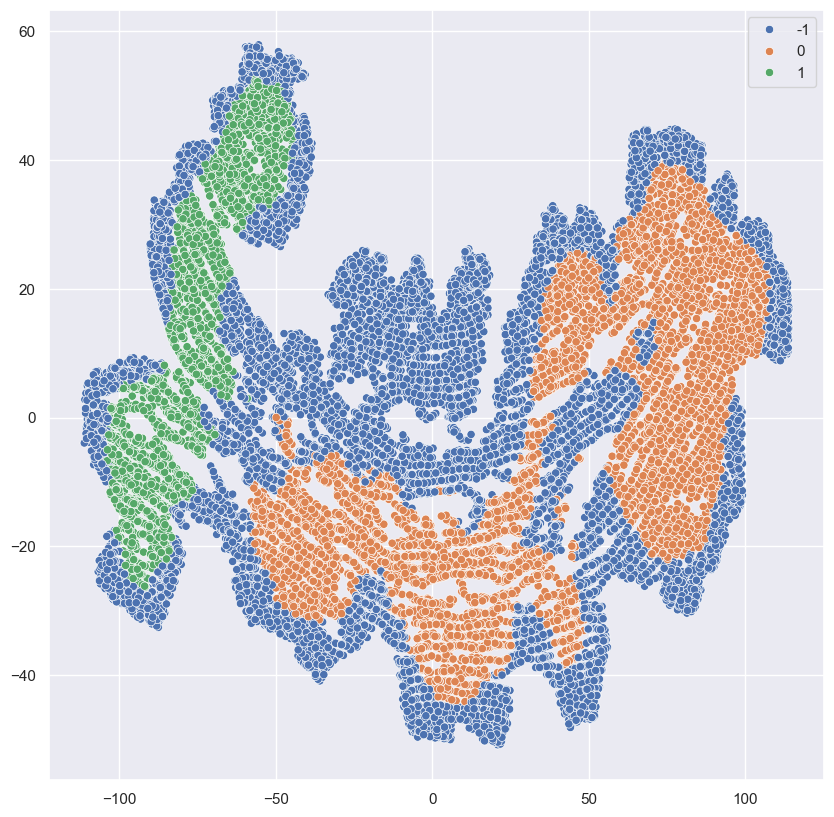

For n_clusters = 3 The average silhouette_score is : -0.0055810343


In [35]:
# Perform clustering with HDBSCAN
clusterer = HDBSCAN(min_cluster_size=min_cluster_size,
                    gen_min_span_tree=True,
                    metric='euclidean',
                    algorithm='best',
                    leaf_size=40,
                    cluster_selection_method='eom')
cluster_labels = clusterer.fit_predict(data_pca_tsne_reduced)

# Get the silhouette score
silhouette_avg = silhouette_score(data_pca_tsne_reduced, cluster_labels)

# Plot the clusters
sns.set(rc= {'figure.figsize': (10, 10)})
sns.scatterplot(x=data_pca_tsne_reduced[:,0], y=data_pca_tsne_reduced[:,1], hue=cluster_labels, palette='deep')
plt.show()

print("For n_clusters =", len(set(cluster_labels)), "The average silhouette_score is :", silhouette_avg)

In [36]:
data_copy['cluster_labels'] = cluster_labels
data['cluster_labels'] = cluster_labels

In [37]:
# Analyzing 
size_of_each_cluster= data_copy.groupby('cluster_labels').size().reset_index()
size_of_each_cluster.columns = ['cluster_labels','number_of_points']
size_of_each_cluster['percentage'] = (size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points']))*100

print(size_of_each_cluster)

   cluster_labels  number_of_points  percentage
0              -1             12249   54.100967
1               0              7350   32.463230
2               1              3042   13.435802


## K-Means Clustering

In [38]:
# from scipy import stats
# from sklearn.cluster import KMeans
# import pylab as pl
# %matplotlib inline

In [39]:
# data_review_data_std = stats.zscore(data_pca_tsne_reduced)
# data_review_data_std = np.array(data_review_data_std)

# sns.set(rc= {'figure.figsize': (7,7)})
# number_of_clusters = range(1,20)

# t0= time.time()
# kmeans = [KMeans(n_clusters=i, max_iter=1000, random_state=33) for i in number_of_clusters]
# score = [-1*kmeans[i].fit(data_pca_tsne_reduced).score(data_pca_tsne_reduced) for i in range(len(kmeans))]
# t1= time.time()

# pl.plot((number_of_clusters),score)
# pl.xlabel('Number of Clusters')
# plt.xticks(np.arange(0, 20, step=1))
# pl.ylabel('Score')
# pl.title('Elbow Curve')
# pl.show()

# print("Plotting the Elbow curve took:{:.1f}s ".format(t1-t0))

using silhouette score to determine best clusters

In [40]:
# from sklearn.metrics import silhouette_score

In [41]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#  kmeans = KMeans(n_clusters=num_clusters)
#  kmeans.fit(data_pca_tsne_reduced)
#  cluster_labels = kmeans.labels_
 
#  # silhouette score
#  silhouette_avg.append(silhouette_score(data_pca_tsne_reduced, cluster_labels))

# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Number of Clusters') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [42]:
# print(silhouette_avg)

Silhouette maximized at # of cluster is 2, so we will use 2 clusters

In [38]:
# kmeans_test = KMeans(n_clusters=2, max_iter=1500, random_state=33,verbose=1)

# #fitting on your model
# -1*kmeans_test.fit(data_pca_tsne_reduced).score(data_pca_tsne_reduced)
# y_pred_bottoms= kmeans_test.labels_

# # Assigning cluster labels to each data point
# data_copy['klabels'] = kmeans_test.labels_
# data['klabels'] = kmeans_test.labels_

Initialization complete
Iteration 0, inertia 77816184.0.
Iteration 1, inertia 38952100.0.
Iteration 2, inertia 35167912.0.
Iteration 3, inertia 34525620.0.
Iteration 4, inertia 34340972.0.
Iteration 5, inertia 34272268.0.
Iteration 6, inertia 34241880.0.
Iteration 7, inertia 34228508.0.
Iteration 8, inertia 34223120.0.
Converged at iteration 8: center shift 0.08621537685394287 within tolerance 0.21827546386718752.


In [39]:
# # Analyzing 
# size_of_each_cluster= data_copy.groupby('klabels').size().reset_index()
# size_of_each_cluster.columns = ['klabels','number_of_points']
# size_of_each_cluster['percentage'] = (size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points']))*100

# print(size_of_each_cluster)

   klabels  number_of_points  percentage
0        0             11515   50.859061
1        1             11126   49.140939


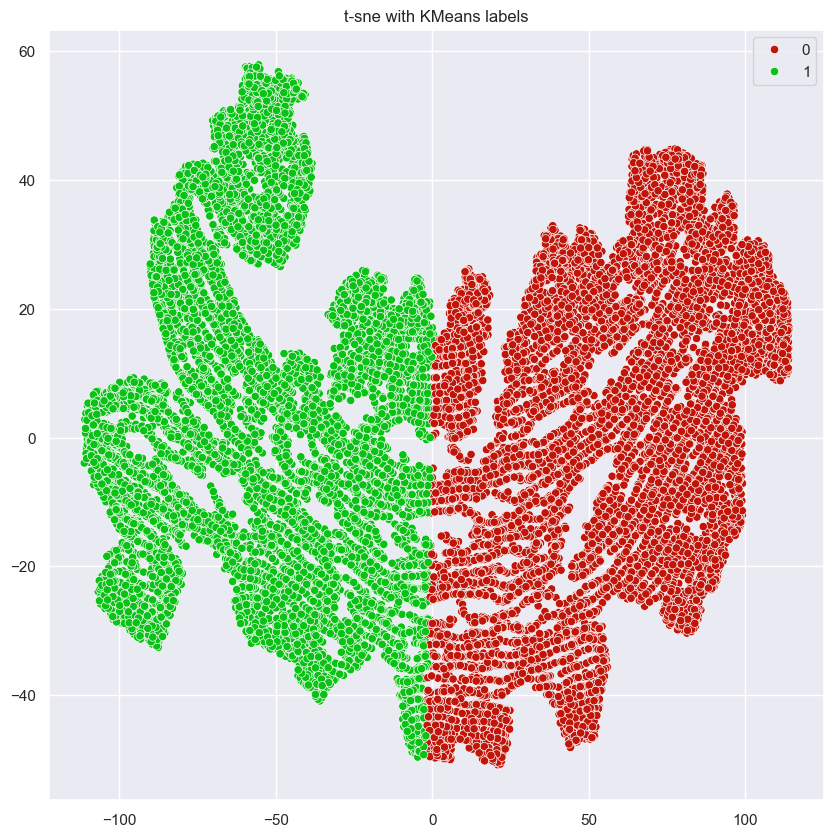

In [40]:
# palette = sns.hls_palette(3, l=.4, s=.9)

# sns.set(rc= {'figure.figsize': (10,10)})
# sns.scatterplot(x=data_pca_tsne_reduced[:,0], y=data_pca_tsne_reduced[:,1], hue= y_pred_bottoms, legend='full', palette=palette)
# plt.title("t-sne with KMeans labels")
# plt.show()

# Topic Modeling

## LDA

### Determining number of clusters

In [30]:
# from gensim.corpora.dictionary import Dictionary

In [32]:
# data_copy.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name_0,Division_Name_1,Division_Name_2,Department_Name_0,Department_Name_1,Department_Name_2,...,Class_Name_3,Class_Name_4,review_word_count,review_unique_word_count,new_clothingID_0,new_clothingID_1,new_clothingID_2,new_clothingID_3,new_clothingID_4,total_sentiment_score
0,33,4,1,0,0,0,1,0,0,1,...,0,1,8,7,0,0,0,0,1,0.8932
1,34,5,1,4,0,1,0,0,1,0,...,1,0,62,47,0,0,0,1,0,0.9729
2,60,3,0,0,0,1,0,0,1,0,...,1,0,98,72,0,0,0,1,1,0.9208
3,50,5,1,0,0,1,1,0,1,1,...,1,1,22,20,0,0,0,0,1,1.0820
4,47,5,1,6,0,1,0,1,0,0,...,0,0,36,28,0,0,0,0,1,1.2473


In [34]:
# dictionary = Dictionary(data['Final Text'])
# corpus = [dictionary.doc2bow(text) for text in data['Final Text']]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<9043 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'bc']...>
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary<13187 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'bc']...>
INFO:gensim.corpora.dictionary:built Dictionary<14147 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'bc']...> from 22641 documents (total 399164 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<14147 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'bc']...> from 22641 documents (total 399164 corpus positions)", 'datetime': '2024-06-03T00:44:03.123256', 'gensim': '4.3.2', 'python': '3.12.2 | packaged by Anaconda, Inc. | (main, Feb 27 2024, 17:28:07) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'created'}


In [40]:
# token_text = data['Final Text']
# token_text = list(token_text)

In [53]:
# from gensim.models import LdaModel
# from gensim.models import CoherenceModel

In [54]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=32, chunksize=100, passes=10, per_word_topics=True)
#         # model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
#         # dtm = vectorizer.transform(texts)
#         # model.fit(dtm)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         print(f"Coherence value for {num_topics} topics: {coherencemodel.get_coherence()}")
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

In [57]:
# logging.basicConfig(level=logging.CRITICAL)
# logging.getLogger().setLevel(logging.CRITICAL)

In [59]:
# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=token_text, start=1, limit=10, step=1)

Coherence value for 1 topics: 0.2849591401596462
Coherence value for 2 topics: 0.3384704062687166
Coherence value for 3 topics: 0.3573729599724052
Coherence value for 4 topics: 0.32640267062281414
Coherence value for 5 topics: 0.3457989256225021
Coherence value for 6 topics: 0.3538727098659045
Coherence value for 7 topics: 0.33525207458103035


In [ ]:
# # Show graph
# import matplotlib.pyplot as plt
# limit=10; start=1; step=1;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

### Train LDA

In [43]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import Phrases
from collections import Counter
from gensim.models import Word2Vec

In [44]:
from gensim.models.coherencemodel import CoherenceModel

In [45]:
df_nouns_adj = data['Final Text']

In [46]:
docs= list(df_nouns_adj)
phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)

In [47]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

In [52]:
def extract_topic_lda(data, num_cluster=None, num_topics=3):
  models = {}
  topics = {}
  coherence_scores = {}

  if num_cluster == None:
    num_cluster = data['cluster_labels'].nunique()

  print(f"Number of clusters: {num_cluster}\n")

  for i in range(0, num_cluster-1, 1):
    print(f"================= Cluster {i}\n\n")
    filtered_data = data[data['cluster_labels'] == i]
    docs = list(filtered_data['Final Text'])
    phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
    bigram_model = gensim.models.phrases.Phraser(phrases)
    data_words_bigrams = make_bigrams(docs)

    if len(data_words_bigrams) > 0:  # Check if the vocabulary is not empty
        w2vmodel = Word2Vec(bigram_model[docs], vector_size=100, sg=1, hs=1, seed=33, epochs=35, negative=0)
        bigram_counter = Counter()

        for key in w2vmodel.wv.key_to_index:
            if key not in STOPWORDS:
                if len(str(key).split("_")) > 1:
                    bigram_counter[key] += w2vmodel.wv.get_vecattr(key, 'count')

        for key, counts in bigram_counter.most_common(10):
            print(key,">>>>", counts)

    print('\n')

    texts = data_words_bigrams if len(data_words_bigrams) > 0 else docs

    dictionary= Dictionary(data_words_bigrams)
    # Filter out words that occur less than 20 documents, or more than 50% of the documents.
    dictionary.filter_extremes(no_below=20, no_above=0.6)
    corpus = [dictionary.doc2bow(doc) for doc in docs]


    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    t0 = time.time()
    passes = 15
    np.random.seed(42) # setting up random seed to get the same results
    ldamodel = LdaMulticore(corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
    #                   alpha='asymmetric',
                        chunksize=100,
                        batch= True,
                        minimum_probability=0.001,
                        iterations=20,
                        passes=passes)

    t1= time.time()
    print("time for",passes," passes: ",(t1-t0)," seconds")

    models[f'cluster {i}'] = ldamodel

    temp = {}
    for k in range(num_topics):
      temp[f'topic {k}'] = ldamodel.show_topics(num_words=25, formatted=False)[k][1]
    topics[f'cluster {i}'] = temp

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores[f'cluster {i}'] = coherence_lda

    
    print('\n\n')

  return models, topics, coherence_scores

In [53]:
models_lda, topics_lda, coherence_lda = extract_topic_lda(data)

Number of clusters: 3

================= Cluster 0


true_size >>>> 400
many_compliments >>>> 127
cant_wait >>>> 103
skinny_jeans >>>> 95
sale_price >>>> 66
full_price >>>> 64
runs_large >>>> 53
first_time >>>> 46
arm_holes >>>> 42
lots_compliments >>>> 42


Number of unique tokens: 609
Number of documents: 7350
time for 15  passes:  6.495134592056274  seconds



================= Cluster 1


true_size >>>> 177
super_soft >>>> 55
skinny_jeans >>>> 54
local_retailer >>>> 49
full_price >>>> 44
im_glad >>>> 43
many_compliments >>>> 42
first_time >>>> 42
arm_holes >>>> 40
local_store >>>> 40


Number of unique tokens: 647
Number of documents: 3042
time for 15  passes:  3.704756021499634  seconds





In [54]:
import json
class Encoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.float32):
            return float(obj)
        return json.JSONEncoder.default(self, obj)
    

json.dump(topics_lda, open('hdbscan_topics_lda.json', 'w'), cls=Encoder)

In [55]:
topics_2d = [[word for word, _ in topics_lda['cluster {}'.format(i)]['topic {}'.format(j)]] for i in range(2) for j in range(3)]
json.dump(topics_2d, open('topics_2d.json', 'w'), cls=Encoder)
for i in range(2):
    for j in range(3):
        print('cluster', i, 'topic', j, ':', [word for word, _ in topics_lda['cluster {}'.format(i)]['topic {}'.format(j)]])

cluster 0 topic 0 : ['size', 'love', 'top', 'great', 'cute', 'pants', 'im', 'soft', 'comfortable', 'sweater', 'small', 'big', 'true', 'colors', 'nice', 'fit', 'summer', 'jeans', 'dress', 'fabric', 'large', 'little', 'perfect', 'beautiful', 'fits']
cluster 0 topic 1 : ['dress', 'fit', 'size', 'top', 'small', 'fabric', 'im', 'great', 'beautiful', 'perfect', 'nice', 'petite', 'quality', 'length', 'large', 'fits', 'little', 'colors', 'waist', 'medium', 'person', 'lbs', 'cute', 'cut', 'skirt']
cluster 0 topic 2 : ['great', 'dress', 'shirt', 'material', 'soft', 'comfortable', 'love', 'jeans', 'fabric', 'im', 'compliments', 'fit', 'little', 'cute', 'price', 'top', 'beautiful', 'sweater', 'perfect', 'sale', 'black', 'time', 'white', 'many', 'way']
cluster 1 topic 0 : ['size', 'top', 'fit', 'jeans', 'pants', 'fabric', 'petite', 'im', 'dress', 'great', 'white', 'length', 'comfortable', 'little', 'love', 'cute', 'black', 'waist', 'nice', 'pair', 'perfect', 'soft', 'store', 'bit', 'blue']
cluster 

### Use BERTopic

In [56]:
from bertopic import BERTopic

In [61]:
def extract_topic_bert(data, num_clusters=None, no_topics=4):
    models = {}
    topics = {}

    if num_clusters == None:
        num_clusters = data['cluster_labels'].nunique()

    print(f"Number of clusters: {num_clusters}\n")

    for i in range(0, num_clusters-1, 1):
        print(f"================= Cluster {i}\n")
        model = BERTopic(nr_topics=no_topics, language="english", verbose=True, embedding_model="paraphrase-MiniLM-L6-v2", min_topic_size=10)
        filtered_data = data[data['cluster_labels'] == i]
        docs = list(filtered_data['Final Text'])
        phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
        bigram_model = gensim.models.phrases.Phraser(phrases)
        data_words_bigrams = make_bigrams(docs)

        # Join the words in the bigrams back into a single string
        docs = [' '.join(doc) for doc in data_words_bigrams]

        headline_topics, _ = model.fit_transform(docs)
        freq = model.get_topic_info()
        print(f'Extracted {len(freq)} topics\n')
        topics[f'Cluster {i}'] = freq
        models[f'Cluster {i}'] = model
        print('\n\n')
    return models, topics

In [62]:
model_bert, topic_bert = extract_topic_bert(data)

Number of clusters: 3

================= Cluster 0



2024-06-03 04:16:13,973 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 230/230 [00:30<00:00,  7.66it/s]
2024-06-03 04:16:46,666 - BERTopic - Embedding - Completed ✓
2024-06-03 04:16:46,667 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-03 04:17:15,118 - BERTopic - Dimensionality - Completed ✓
2024-06-03 04:17:15,118 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-03 04:17:15,383 - BERTopic - Cluster - Completed ✓
2024-06-03 04:17:15,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-03 04:17:15,496 - BERTopic - Representation - Completed ✓
2024-06-03 04:17:15,496 - BERTopic - Topic reduction - Reducing number of topics
2024-06-03 04:17:15,568 - BERTopic - Topic reduction - Reduced number of topics from 75 to 4


Extracted 4 topics




================= Cluster 1



2024-06-03 04:17:15,808 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 96/96 [00:21<00:00,  4.48it/s]
2024-06-03 04:17:39,139 - BERTopic - Embedding - Completed ✓
2024-06-03 04:17:39,139 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-03 04:17:52,329 - BERTopic - Dimensionality - Completed ✓
2024-06-03 04:17:52,329 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-03 04:17:52,454 - BERTopic - Cluster - Completed ✓
2024-06-03 04:17:52,454 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-03 04:17:52,519 - BERTopic - Representation - Completed ✓
2024-06-03 04:17:52,519 - BERTopic - Topic reduction - Reducing number of topics
2024-06-03 04:17:52,582 - BERTopic - Topic reduction - Reduced number of topics from 22 to 4


Extracted 4 topics






In [63]:
topic_bert['Cluster 0'].to_json('hdbscan_topics_bert_0.json', orient='records', lines=True)
topic_bert['Cluster 1'].to_json('hdbscan_topics_bert_1.json', orient='records', lines=True)

In [64]:
model_bert

{'Cluster 0': <bertopic._bertopic.BERTopic at 0x1f4c4cf50d0>,
 'Cluster 1': <bertopic._bertopic.BERTopic at 0x1f4dab10920>}

In [65]:
topic_bert['Cluster 0']

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2629,-1_top_size_great_fit,"[top, size, great, fit, im, dress, love, small...",[love dress fabric bottom top balloon poofed w...
1,0,4597,0_dress_great_size_top,"[dress, great, size, top, fit, love, im, small...",[dress comfortable adorable fit love love love...
2,1,102,1_many_compliments_compliments_lots_compliment...,"[many_compliments, compliments, lots_complimen...","[size fit perfect many_compliments, cute top m..."
3,2,22,2_comfortable_sleep_sleepwear_lounge,"[comfortable, sleep, sleepwear, lounge, cozy, ...","[yesyou comfortable wash great sleep, george v..."


In [66]:
topic_bert['Cluster 1']

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1138,-1_top_size_fit_fabric,"[top, size, fit, fabric, small, im, great, dre...",[hopes top thought previous_reviewer quality m...
1,0,1826,0_dress_size_fit_im,"[dress, size, fit, im, fabric, top, small, gre...",[liked dress online local_store small medium i...
2,1,66,1_tee_wash_top_dry,"[tee, wash, top, dry, shirt, black, tees, litt...",[white size baggy fit tts white offwhite brigh...
3,2,12,2_romper_rompers_buying_short,"[romper, rompers, buying, short, im, size, gre...",[romper great shape saggy grandma butt rompers...


In [67]:
for i in range(4):
    print(topic_bert['Cluster 0'].iloc[i]['Representation'])

['top', 'size', 'great', 'fit', 'im', 'dress', 'love', 'small', 'fabric', 'soft']
['dress', 'great', 'size', 'top', 'fit', 'love', 'im', 'small', 'fabric', 'comfortable']
['many_compliments', 'compliments', 'lots_compliments', 'great', 'comfortable', 'top', 'first_time', 'time', 'get', 'dress']
['comfortable', 'sleep', 'sleepwear', 'lounge', 'cozy', 'nightgown', 'little', 'sexy', 'love', 'wash']


In [68]:
for i in range(4):
    print(topic_bert['Cluster 1'].iloc[i]['Representation'])

['top', 'size', 'fit', 'fabric', 'small', 'im', 'great', 'dress', 'little', 'love']
['dress', 'size', 'fit', 'im', 'fabric', 'top', 'small', 'great', 'little', 'length']
['tee', 'wash', 'top', 'dry', 'shirt', 'black', 'tees', 'little', 'cold_water', 'im']
['romper', 'rompers', 'buying', 'short', 'im', 'size', 'great', 'butt', 'fit', 'top']


### Calculate coherence score

In [69]:
print(f'Cluster 0 LDAs coherence score: {coherence_lda["cluster 0"]}')
print(f'Cluster 1 LDAs coherence score: {coherence_lda["cluster 1"]}')

Cluster 0 LDAs coherence score: 0.27348562453686226
Cluster 1 LDAs coherence score: 0.2521279010089507


In [74]:
(0.27348562453686226 + 0.2521279010089507)/2

0.2628067627729065

In [70]:
def calculate_score_bert(model):
    # Get the most frequent topics
    topic_freq = model.get_topic_freq()

    # Get the words for each topic
    topics = [[word for word, _ in model.get_topic(topic)] for topic in topic_freq['Topic']]

    # Create a dictionary and a corpus from the topics
    dictionary = Dictionary(topics)
    corpus = [dictionary.doc2bow(topic) for topic in topics]

    # Compute the coherence score for each topic
    coherence_model = CoherenceModel(topics=topics, texts=topics, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score

In [71]:
cluster0_bert_score = calculate_score_bert(model_bert['Cluster 0'])
print(f"Cluster 0 BERT coherence score: {cluster0_bert_score}")

cluster1_bert_score = calculate_score_bert(model_bert['Cluster 1'])
print(f"Cluster 1 BERT coherence score: {cluster1_bert_score}")

Cluster 0 BERT coherence score: 0.8322240939969363
Cluster 1 BERT coherence score: 0.7192238928481995


In [75]:
(0.8322240939969363 + 0.7192238928481995)/2

0.7757239934225679

In [72]:
model_bert['Cluster 0'].get_topic_freq()

,Topic,Count
0,0,4597
1,-1,2629
2,1,102
3,2,22


In [73]:
model_bert['Cluster 1'].get_topic_freq()

,Topic,Count
1,0,1826
0,-1,1138
2,1,66
3,2,12
